<a href="https://colab.research.google.com/github/anferivera/Programming/blob/main/6_1_linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra

based in Diego Restrepo notebooks. https://github.com/restrepo/ComputationalMethods

Linear Algebra is a discipline where vector spaces and linear mapping between them are studied. In physics and astronomy, several phenomena can be readily written in terms of linear variables, what makes Computational Linear Algebra a very important topic to be covered throughout this course. We shall cover linear systems of equations, techniques for calculating inverses and determinants and factorization methods.

An interesting fact of Computational Linear Algebra is that it does not comprises numerical approaches as most of the methods are exact. The usage of a computer is then necessary because of the large number of calculations rather than the non-soluble nature of the problems. Numerical errors come then from round-off approximations.

See: http://pages.cs.wisc.edu/~amos/412/lecture-notes/lecture14.pdf

In [1]:
from IPython.display import HTML, Markdown, YouTubeVideo,Latex
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
#Interpolation add-on
import scipy.interpolate as interp
xrange=range

import sympy

Populating the interactive namespace from numpy and matplotlib


https://stackoverflow.com/a/50748163

- - -

## Matrices in Python

One of the most useful advantages of high level languages like Python, is the manipulation of complex objects like matrices and vectors. For this part we are going to use advanced capabilities for handling matrices, provided by the library NumPy.

NumPy, besides the extreme useful NumPy array objects, which are like tensors of any rank, also provides the Matrix objects that are overloaded with proper matrix operations.

### Numpy arrays

* A matrix can be represented by an array of two indices

In [ ]:
#NumPy Arrays
M1 = np.array( [[ 5 ,-4, 0],
                [-4 , 7,-3],
                [ 0 ,-3, 5]] )

M2 = np.array( [[3,-2,1],[-1,5,4],[1,-2,3]] )

#print( f'M1=\n{M1}, with shape={M1.shape},\n\nM2=\n{M2}' )
print( 'M1=\n',M1, 'with shape=',M1.shape, '\n\n', M2 )

M1=
 [[ 5 -4  0]
 [-4  7 -3]
 [ 0 -3  5]] with shape= (3, 3) 

 [[ 3 -2  1]
 [-1  5  4]
 [ 1 -2  3]]


In [ ]:
M1

array([[ 5, -4,  0],
       [-4,  7, -3],
       [ 0, -3,  5]])

Note tha the previous definitions correspond to integer arrays.

__WARNING__: Be careful with integer arrays. In the next example, a single float entry convert the full matrix from an integer array to a float array:

In [ ]:
M1[1,1]

np.int64(7)

float

In [ ]:
np.array([[ 5, -4,  0],
          [-4,  7, -3],
          [ 0, -3,  5]])

array([[ 5, -4,  0],
       [-4,  7, -3],
       [ 0, -3,  5]])

In [ ]:
M1/3

array([[ 1.66666667, -1.33333333,  0.        ],
       [-1.33333333,  2.33333333, -1.        ],
       [ 0.        , -1.        ,  1.66666667]])

#### Special arrays:
Let $n$ the range of the matrix
* zero matrix

In [ ]:
n=3
np.zeros( (n,n) )

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

* Ones matrix

In [ ]:
np.ones( (n,n) )

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
1+2j

(1+2j)

In [ ]:
np.ones( (n,n) )*1j

array([[0.+1.j, 0.+1.j, 0.+1.j],
       [0.+1.j, 0.+1.j, 0.+1.j],
       [0.+1.j, 0.+1.j, 0.+1.j]])

* Identity matrix

In [ ]:
np.identity(n)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
np.diag([1,3,6])

array([[1, 0, 0],
       [0, 3, 0],
       [0, 0, 6]])

* Random matrix with entries between 0 and 1

In [ ]:
np.random.random()

0.27986581119641507

In [ ]:
#np.random.seed(986554575)
np.random.random((n,n))

array([[0.61781552, 0.12589224, 0.68552388],
       [0.2479286 , 0.19094253, 0.21160255],
       [0.36489024, 0.06248647, 0.94638797]])

In [ ]:
np.random.uniform(0,10,(n,n))

array([[4.22502612, 6.55709897, 2.58311744],
       [3.13839431, 0.37024266, 3.5445809 ],
       [7.76480723, 3.37611031, 8.66164525]])

* Integer Random matrix

In [ ]:
np.random.randint(0,10,(n,n)) #0 to 9

array([[1, 1, 6],
       [3, 2, 9],
       [6, 9, 2]])

In [ ]:
M1

array([[ 5, -4,  0],
       [-4,  7, -3],
       [ 0, -3,  5]])

#### Analytical matrices
Some times it is necessary to work with analytical Matrices. In such a case we can use the symbolic module `Sympy`

In [ ]:
import sympy
x =sympy.Symbol('x') ## declare analytical varibles
sympy.init_printing() ## Use LaTeX to print sympy obejects

In [ ]:
#NumPy Arrays
M1 = np.array( [[ 5 ,-4, 0],
                [-4 , 7,-3],
                [ 0 ,-3, 5]] )
M2 = np.array( [[3,-2,1],[-1,5,4],[1,-2,3]] )

In [ ]:
M2

array([[ 3, -2,  1],
       [-1,  5,  4],
       [ 1, -2,  3]])

In [ ]:
print(M2)

[[ 3 -2  1]
 [-1  5  4]
 [ 1 -2  3]]


In [ ]:
M2[0,1]

np.int64(-2)

In [ ]:
sympy.Matrix(M2)

⎡3   -2  1⎤
⎢         ⎥
⎢-1  5   4⎥
⎢         ⎥
⎣1   -2  3⎦

In the following we will focus only in numerical matrices as `numpy` arrays, but also use `sympy` to print the matrices in a more readable way
#### Matrix operations (numpy)
Both as functions or array's methods
* Transpose

$M_2^{\rm T}=$

In [ ]:
from IPython import display

In [ ]:
M2.transpose()

array([[ 3, -1,  1],
       [-2,  5, -2],
       [ 1,  4,  3]])

In [ ]:
sympy.Matrix( M2.transpose())

⎡3   -1  1 ⎤
⎢          ⎥
⎢-2  5   -2⎥
⎢          ⎥
⎣1   4   3 ⎦

* Matrix addition

In [ ]:
sympy.Matrix(M1)

⎡5   -4  0 ⎤
⎢          ⎥
⎢-4  7   -3⎥
⎢          ⎥
⎣0   -3  5 ⎦

In [ ]:
sympy.Matrix(M2)

⎡3   -2  1⎤
⎢         ⎥
⎢-1  5   4⎥
⎢         ⎥
⎣1   -2  3⎦

In [ ]:
sympy.Matrix( M1+M2 )

⎡8   -6  1⎤
⎢         ⎥
⎢-5  12  1⎥
⎢         ⎥
⎣1   -5  8⎦

Complex arrays are allowed

In [ ]:
Mc=M1+M2*1j
sympy.Matrix( M1+M2*1j )

⎡5.0 + 3.0⋅ⅈ   -4.0 - 2.0⋅ⅈ     1.0⋅ⅈ    ⎤
⎢                                        ⎥
⎢-4.0 - 1.0⋅ⅈ  7.0 + 5.0⋅ⅈ   -3.0 + 4.0⋅ⅈ⎥
⎢                                        ⎥
⎣   1.0⋅ⅈ      -3.0 - 2.0⋅ⅈ  5.0 + 3.0⋅ⅈ ⎦

with the corresponding complex matrix operations

In [ ]:
sympy.Matrix(  Mc.conjugate() )
#display ( sympy.Matrix(  Mc.conjugate().transpose() ) ) ## hermitian-conjugate

⎡5.0 - 3.0⋅ⅈ   -4.0 + 2.0⋅ⅈ     -1.0⋅ⅈ   ⎤
⎢                                        ⎥
⎢-4.0 + 1.0⋅ⅈ  7.0 - 5.0⋅ⅈ   -3.0 - 4.0⋅ⅈ⎥
⎢                                        ⎥
⎣   -1.0⋅ⅈ     -3.0 + 2.0⋅ⅈ  5.0 - 3.0⋅ⅈ ⎦

* Matrix multiplication
![MP](https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Matrix_multiplication_diagram_2.svg/200px-Matrix_multiplication_diagram_2.svg.png)

```python
dot(a, b, out=None)
```

Dot product of two arrays. Specifically,

- If both `a` and `b` are 1-D arrays, it is inner product of vectors
  (without complex conjugation).

- If both `a` and `b` are 2-D arrays, it is matrix multiplication,
  but using :func:`matmul` or ``a @ b`` is preferred.

- If either `a` or `b` is 0-D (scalar), it is equivalent to :func:`multiply`
  and using ``numpy.multiply(a, b)`` or ``a * b`` is preferred.

- ...

In [ ]:
M1 = np.array( [[ 5 ,-4, 0],
                [-4 , 7,-3],
                [ 0 ,-3, 5]] )
M2 = np.array( [[3,-2,1],
                [-1,5,4],
                [1,-2,3]] )

In [ ]:
np.dot( M1, M2 )

array([[ 19, -30, -11],
       [-22,  49,  15],
       [  8, -25,   3]])

In [ ]:
#not recomended
M1*M2

array([[ 15,   8,   0],
       [  4,  35, -12],
       [  0,   6,  15]])

In [ ]:
#Multiplication
sympy.Matrix( np.dot( M1, M2 ) )

⎡19   -30  -11⎤
⎢             ⎥
⎢-22  49   15 ⎥
⎢             ⎥
⎣ 8   -25   3 ⎦

In [ ]:
sympy.Matrix( M1.dot(M2) )

⎡19   -30  -11⎤
⎢             ⎥
⎢-22  49   15 ⎥
⎢             ⎥
⎣ 8   -25   3 ⎦

Recommended way

In [ ]:
sympy.Matrix(M1@M2)

⎡19   -30  -11⎤
⎢             ⎥
⎢-22  49   15 ⎥
⎢             ⎥
⎣ 8   -25   3 ⎦

In [ ]:
#Multiplication is not commutative
sympy.Matrix ( M2@M1 )

⎡23   -29  11⎤
⎢            ⎥
⎢-25  27   5 ⎥
⎢            ⎥
⎣13   -27  21⎦

* Complex matrices

In [ ]:
σ_2=np.array(
    [[0,-1j],
     [1j,0]])
sympy.Matrix(σ_2)

⎡  0    -1.0⋅ⅈ⎤
⎢             ⎥
⎣1.0⋅ⅈ    0   ⎦

* Trace

In [ ]:
np.trace(σ_2)

np.complex128(0j)

* Determinant

In [ ]:
np.linalg.det(σ_2)

np.complex128(-1+0j)

Raise a square matrix to the (integer) power `n`.

In [ ]:
sympy.Matrix ( np.linalg.matrix_power(σ_2,2) )

⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦

In [ ]:
sympy.Matrix ( np.linalg.matrix_power(σ_2,3) )

⎡  0    -1.0⋅ⅈ⎤
⎢             ⎥
⎣1.0⋅ⅈ    0   ⎦

In [ ]:
(σ_2@σ_2).astype(float)

/tmp/ipython-input-48-501469815.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  (σ_2@σ_2).astype(float)


array([[1., 0.],
       [0., 1.]])

odd power

In [ ]:
sympy.Matrix ( np.linalg.matrix_power(σ_2,7) )

⎡  0    -1.0⋅ⅈ⎤
⎢             ⎥
⎣1.0⋅ⅈ    0   ⎦

even power

In [ ]:
sympy.Matrix ( np.linalg.matrix_power(σ_2,14) )

⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦

Inverse of a matrix

In [ ]:
sympy.Matrix(M2)

⎡3   -2  1⎤
⎢         ⎥
⎢-1  5   4⎥
⎢         ⎥
⎣1   -2  3⎦

In [ ]:
sympy.Matrix( np.linalg.inv(M2) )

⎡ 0.442307692307692   0.0769230769230769  -0.25⎤
⎢                                              ⎥
⎢ 0.134615384615385   0.153846153846154   -0.25⎥
⎢                                              ⎥
⎣-0.0576923076923077  0.0769230769230769  0.25 ⎦

In [ ]:
sympy.Matrix ( ( M2@np.linalg.inv(M2) ).round(3) )

⎡1.0  0.0  0.0⎤
⎢             ⎥
⎢0.0  1.0  0.0⎥
⎢             ⎥
⎣0.0  0.0  1.0⎦

In [ ]:
sympy.Matrix ( ( M2@np.linalg.inv(M2) ).round(3).astype(int) )

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

#### Element by element operations

In [ ]:
print(M1)
M2

[[ 5 -4  0]
 [-4  7 -3]
 [ 0 -3  5]]


array([[ 3, -2,  1],
       [-1,  5,  4],
       [ 1, -2,  3]])

In [ ]:
M1*M2

array([[ 15,   8,   0],
       [  4,  35, -12],
       [  0,   6,  15]])

In [ ]:
#Division
print( M1,'\n\n', M2,'\n\n', M1/M2 )

[[ 5 -4  0]
 [-4  7 -3]
 [ 0 -3  5]] 

 [[ 3 -2  1]
 [-1  5  4]
 [ 1 -2  3]] 

 [[ 1.66666667  2.          0.        ]
 [ 4.          1.4        -0.75      ]
 [ 0.          1.5         1.66666667]]


realiza una división entre los elementos de las matrices que se encuentran en la misma posición.

#### Submatrix from matrix:

In [ ]:
M1 = np.array( [[ 5 ,-4, 0],
                [-4 , 7,-3],
                [ 0 ,-3, 5]] )

Elements of the matrix

In [ ]:
M1[0,1]

np.int64(-4)

In [ ]:
for i in range(0,3):
  print(M1[0,i])

5
-4
0


#### Extract rows

In [ ]:
M1[0,:]

array([ 5, -4,  0])

or

In [ ]:
M1[1]

array([-4,  7, -3])

In general:
`M1[list of rows to extract]`

In [ ]:
M1[[1]]

array([[-4,  7, -3]])

In [ ]:
M1 = np.array( [[ 5 ,-4, 0],
                [-4 , 7,-3],
                [ 0 ,-3, 5]] )

In [ ]:
M1[[0,2]]

array([[ 5, -4,  0],
       [ 0, -3,  5]])

#### Extract columns

In [ ]:
M1[:,1]

array([-4,  7, -3])

and convert back into a column

In [ ]:
np.c_[M1[:,1]]

array([[-4],
       [ 7],
       [-3]])

#### Reordering

In [ ]:
M1 = np.array( [[ 5 ,-4, 0],
                [-4 , 7,-3],
                [ 0 ,-3, 5]] )

Reverse row order to 2,1,0

In [ ]:
M1[[2,1,0]]

array([[ 0, -3,  5],
       [-4,  7, -3],
       [ 5, -4,  0]])

or

In [ ]:
np.r_[[M1[2]],[M1[1]],[M1[0]]]

array([[ 0, -3,  5],
       [-4,  7, -3],
       [ 5, -4,  0]])

Reverse column order to 2,1,0

In [ ]:
np.c_[ M1[:,2],M1[:,1],M1[:,0]  ]

array([[ 0, -4,  5],
       [-3,  7, -4],
       [ 5, -3,  0]])

#### It is possible to reasign a full set of rows to a matrix

In [ ]:
M1 = np.array( [[ 5,-4, 0],
                [-4, 7,-3],
                [ 0,-3, 5]] )

In [ ]:
M1[[0,2]]=[[0  ,1,0.3],
           [0.3,0,0  ]]
M1

array([[ 0,  1,  0],
       [-4,  7, -3],
       [ 0,  0,  0]])

Note that because `M1` has only integer numbers, it is assumed to be an _integer matrix_. In order to allow float assignments, it is first necessary to convert to a _float matrix_:

In [ ]:
M1=M1.astype(float)
M1[[0,2]]=[[0  ,0,0.3],
           [0.3,0,0  ]]
M1

array([[ 0. ,  0. ,  0.3],
       [-4. ,  7. , -3. ],
       [ 0.3,  0. ,  0. ]])

__WARNING__<br/>
In some cases a  reasignment of a list or array points to the same space in memory. To really copy an array to other variable it is always recommended to use the `.copy()` method.

In [ ]:
A=np.array([1,2])
A

array([1, 2])

In [ ]:
A

array([1, 2])

Reassign memory space

In [ ]:
C=A
C

array([1, 2])

A change is reflected in both variables

In [ ]:
C[0]=5
print(f'A={A} → C={C}')

A=[5 2] → C=[5 2]


In [ ]:
A[1]=8
print(f'A={A} → C={C}')

A=[5 8] → C=[5 8]


To keep the first memory space

In [ ]:
B=A.copy() ## two different memory spaces
B[0]=4
print('A =',A)
print('B =',B)

A = [5 8]
B = [4 8]


## Matrix object

numpy also has a Matrix object with simplified operations. However it is recommended to use the general array object even for specific matrix operations. This helps to avoid incompatibilities with usual array operations. For example, as shown below the multiplication symbol, `*`, behaves different for arrays that for matrices, and could induce to errors.

In [ ]:
#NumPy Matrix
M1 = np.matrix( [[5,-4,0],[-4,7,-3],[0,-3,5]] )
M2 = np.matrix( [[3,-2,1],[-1,5,4],[1,-2,3]] )

print (M1, "\n")
print (M2)

[[ 5 -4  0]
 [-4  7 -3]
 [ 0 -3  5]] 

[[ 3 -2  1]
 [-1  5  4]
 [ 1 -2  3]]


In [ ]:
#Addition
sympy.Matrix( M1+M2 )

⎡8   -6  1⎤
⎢         ⎥
⎢-5  12  1⎥
⎢         ⎥
⎣1   -5  8⎦

In [ ]:
#Division
sympy.Matrix( M1/M2 )

⎡1.66666666666667  2.0        0.0       ⎤
⎢                                       ⎥
⎢      4.0         1.4       -0.75      ⎥
⎢                                       ⎥
⎣      0.0         1.5  1.66666666666667⎦

![MP](https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Matrix_multiplication_diagram_2.svg/200px-Matrix_multiplication_diagram_2.svg.png)

In [ ]:
#Multiplication
sympy.Matrix( M1*M2 )

⎡19   -30  -11⎤
⎢             ⎥
⎢-22  49   15 ⎥
⎢             ⎥
⎣ 8   -25   3 ⎦

## Basic operations with matrices

In order to simplify the following methods, we introduce here 3 basic operations over linear systems:

1. The $i$-th row $E_i$ can be multiplied by a non-zero constant $\lambda$, and then a new row used in place of $E_i$, i.e. $(E_i)\rightarrow (\lambda E_i)$. We denote this operation as $\operatorname{Lamb}(E_i,\lambda)$.
2. The $j$-th row $E_j$ can be multiplied by a non-zero constant $\lambda$ and added to some row $E_i$. The resulting value take the place of $E_i$, i.e. $(E_i) \rightarrow (E_i + \lambda E_j)$. We denote this operation as $\operatorname{Comb}(E_i,E_j,\lambda)$.
3. Finally, we define a swapping of two rows as $(E_i)\leftrightarrow (E_j)$, denoted as $\operatorname{Swap}(E_i,E_j)$

#### Extract rows from an array

## <font color='red'>     **Activity** </font>

Write three routines that perform, given a matrix $A$, the previous operations over matrices:

* `row_lamb(i, λ, A)`: `i` is the row to be changed, `λ` the multiplicative factor and `A` the matrix. This function should return the new matrix with the performed operation $(E_i)\rightarrow (\lambda E_i)$.
* `row_comb(i, j, λ, A)`: `i` is the row to be changed, `j` the row to be added, `λ` the multiplicative factor and `A` the matrix. This function should return the new matrix with the performed operation $(E_i) \rightarrow  (E_i + \lambda E_j)$.
* `row_swap(i, j, A)`: `i` and `j` are the rows to be swapped. This function should return the new matrix with the performed operation $(E_i)\leftrightarrow (E_j)$.

... Check the next implementation

In [2]:
import numbers

#Combination function
#Force the matrix to has type float
def row_lamb( i, λ, A ):
    B = A.copy()
    if isinstance(B[0,0],numbers.Integral):
        B=B.astype(float)
    B[i] = λ*B[i]
    return B

def row_comb( i, j, λ, A ):
    B = A.copy()
    if isinstance(B[0,0],numbers.Integral):
        B=B.astype(float)
    B[i] = λ*B[j] + B[i]
    return B

def row_swap( i, j, A ):
    B = A.copy()
    B[[i,j]] = B[[j,i]]
    return B

In [3]:
def row_sawp(i,j,A):
    '''
    i and j are the rows to be swapped
    '''
    B=A.copy()
    B[[i,j]]=B[[j,i]]
    return B

def row_comb(i,j,λ,A):
    '''
    `i` is the row to be changed,
    `j` the row to be added
    `λ` the multiplicative factor
    `A` the matrix.
    operation
    ---------
    E_i→ E_i+λ*E_j
    '''
    B=A.copy()
    if B.dtype==np.dtype('int64'):
        B=B.astype(float)
    B[i]=B[i]+λ*B[j]
    return B

def row_lamb(i,λ,A):
    '''
    `i` is the row to be changed,
    `λ` the multiplicative factor
    `A` the matrix.
    operation
    ---------
    λ → λ*E_i
    '''
    B=A.copy()
    if B.dtype==np.dtype('int64'):
        B=B.astype(float)
    B[i]=λ*B[i]
    return B

Check with

In [ ]:
M1=np.array( [[5,-4,0],[-4,7,-3],[0,-3,5]] )
M1

array([[ 5, -4,  0],
       [-4,  7, -3],
       [ 0, -3,  5]])

In [ ]:
sympy.Matrix( M1)

⎡5   -4  0 ⎤
⎢          ⎥
⎢-4  7   -3⎥
⎢          ⎥
⎣0   -3  5 ⎦

In [ ]:
row_lamb(1,-1/4,M1)

array([[ 5.  , -4.  ,  0.  ],
       [ 1.  , -1.75,  0.75],
       [ 0.  , -3.  ,  5.  ]])

In [ ]:
row_sawp(0,1,M1)

array([[-4,  7, -3],
       [ 5, -4,  0],
       [ 0, -3,  5]])

In [ ]:
row_comb(0,1,5/4,M1)

array([[ 0.  ,  4.75, -3.75],
       [-4.  ,  7.  , -3.  ],
       [ 0.  , -3.  ,  5.  ]])

## **Gaussian Elimination**

### Example 1

Using Kirchhoff's circuit laws, it is possible to solve the next system:

![](https://raw.githubusercontent.com/sbustamante/ComputationalMethods/master/material/figures/circuit.png)

obtaining the next equations:

\begin{align}
A:&&I_A( R+4R ) - I_B( 4R ) =& E \\
C:&&-I_A( 4R ) + I_B( 4R + 3R ) - I_C(3R) =& 0 \\
B:&&-I_B( 3R ) + I_C(3R+2R) =& -2E\,
\end{align}
or
\begin{align}
5\frac{I_A R }{E} - 4\frac{I_B R }{E} =& 1 \\
-4 \frac{I_A R }{E} + 7\frac{I_B R }{E} - 3 \frac{I_C R }{E} =& 0 \\
-3 \frac{I_B R }{E} + 5 \frac{I_C R }{E} =& -2\,.
\end{align}

Defining the variables $x_1 = R I_A/E$, $x_2 = R I_B/E$ and $x_3 = R I_C/E$ we have
\begin{align}
5x_1 - 4x_2 =& 1 \\
-4 x_1 + 7x_2 - 3 x_3 =& 0 \\
-3x_2 + 5 x_3 =& -2\,.
\end{align}


A first method to solve linear systems of equations is the Gaussian elimination. This procedure consists of a set of recursive steps performed in order to diagonalise the matrix of the problem. A suitable way to introduce this method is applying it to some basic problem. To do so, let's take the result of the [Example 1](#Example-1):

$$ \left[ \matrix{
5 & -4 & 0 \\
-4 & 7 & -3 \\
0 & -3 & 5
}\right]
\left[ \matrix{
x_{1} \\
x_{2} \\
x_{3}
}\right]  =
\left[ \matrix{
1 \\
0 \\
-2
}\right]$$

Constructing the associated augmented matrix, we obtain

$$ \left[ \matrix{
5 & -4 & 0 & \vdots & 1 \\
-4 & 7 & -3 & \vdots & 0 \\
0 & -3 & 5 & \vdots & -2
}\right] $$

#### <span style="color:red"> Activity </span>
Use numpy functions to build the augmented matrix M1

In [ ]:
M1 = np.array( [[5,-4,0],[-4,7,-3],[0,-3,5]] )
sympy.Matrix(M1)

⎡5   -4  0 ⎤
⎢          ⎥
⎢-4  7   -3⎥
⎢          ⎥
⎣0   -3  5 ⎦

In [ ]:
np.array( [[1],[0],[-2]] )

array([[ 1],
       [ 0],
       [-2]])

In [ ]:
M1_aug = np.c_[ M1, [[1],[0],[-2]] ]
sympy.Matrix(M1_aug)

⎡5   -4  0   1 ⎤
⎢              ⎥
⎢-4  7   -3  0 ⎥
⎢              ⎥
⎣0   -3  5   -2⎦

or

In [ ]:
M1_aug=np.hstack( (M1,[[1],[0],[-2]]))
sympy.Matrix(M1_aug)

⎡5   -4  0   1 ⎤
⎢              ⎥
⎢-4  7   -3  0 ⎥
⎢              ⎥
⎣0   -3  5   -2⎦

At this point, we can eliminate the coefficients of the variable $x_1$ in the second and third equations. For this, we apply the operations $\operatorname{Comb}(E_2,E_1,4/5)$.

$E_2$ → `[-4,7,-3⋮0]+[4,-16/5,0⋮4/5]=[0,19/5,-3⋮4/5]`


The coefficient in the third equation is already null. We then obtain:

$$ \left[ \matrix{
5 & -4 & 0 & \vdots & 1 \\
0 & 19/5 & -3 & \vdots & 4/5 \\
0 & -3 & 5 & \vdots & -2
}\right] $$

In [ ]:
M1_LU=row_comb(1,0,4/5,M1_aug)
M1_LU

array([[ 5. , -4. ,  0. ,  1. ],
       [ 0. ,  3.8, -3. ,  0.8],
       [ 0. , -3. ,  5. , -2. ]])

Now, we proceed to eliminate the coefficient of $x_2$ in the third equation. For this, we apply again $\operatorname{Comb}(E_3,E_2,3\cdot 5/19)$

$E_3$ → `[0,-3,5⋮-2]+[0,(3*5/19)*(19/5),-(3*5/19)*3⋮(3*5/19)*4/5]→[0,0,50/19⋮-26/19]`


$$ \left[ \matrix{
5 & -4 & 0 & \vdots & 1 \\
0 & 16/5 & -3 & \vdots & 4/5 \\
0 & 0 & 50/19 & \vdots & -26/19
}\right] $$

In [ ]:
M1_LU

array([[ 5. , -4. ,  0. ,  1. ],
       [ 0. ,  3.8, -3. ,  0.8],
       [ 0. , -3. ,  5. , -2. ]])

In [ ]:
M1_LU=row_comb(2,1,3*5/19,M1_LU)
M1_LU

array([[ 5.        , -4.        ,  0.        ,  1.        ],
       [ 0.        ,  3.8       , -3.        ,  0.8       ],
       [ 0.        ,  0.        ,  2.63157895, -1.36842105]])

The final step is to solve for $x_3$ in the last equation, doing the operation $\operatorname{Lamb}(E_3,19/50)$, yielding:

$$ \left[ \matrix{
5 & -4 & 0 & \vdots & 1 \\
0 & 3.8 & -3 & \vdots & 0.8 \\
0 & 0 & 1 & \vdots & -26/50
}\right] $$

From this, it is direct to conclude that $x_3 = -26/50=-0.52$, for $x_2$ and $x_1$ it is only necessary to replace the found value of $x_3$.

In [ ]:
M1_LU = row_lamb(2,19/50,M1_LU)
M1_LU

array([[ 5.  , -4.  ,  0.  ,  1.  ],
       [ 0.  ,  3.8 , -3.  ,  0.8 ],
       [ 0.  ,  0.  ,  1.  , -0.52]])

In [ ]:
M1_LU = row_comb(1,2,3,M1_LU)
M1_LU

array([[ 5.  , -4.  ,  0.  ,  1.  ],
       [ 0.  ,  3.8 ,  0.  , -0.76],
       [ 0.  ,  0.  ,  1.  , -0.52]])

In [ ]:
M1_LU = row_lamb(1,1/(3.8),M1_LU)
M1_LU

array([[ 5.  , -4.  ,  0.  ,  1.  ],
       [ 0.  ,  1.  ,  0.  , -0.2 ],
       [ 0.  ,  0.  ,  1.  , -0.52]])

In [ ]:
M1_LU = row_lamb(0,1/5,M1_LU)
M1_LU

array([[ 1.  , -0.8 ,  0.  ,  0.2 ],
       [ 0.  ,  1.  ,  0.  , -0.2 ],
       [ 0.  ,  0.  ,  1.  , -0.52]])

In [ ]:
M1_LU = row_comb(0,1,0.8,M1_LU)
np.round(M1_LU,3)

array([[ 1.  , -0.  ,  0.  ,  0.04],
       [ 0.  ,  1.  ,  0.  , -0.2 ],
       [ 0.  ,  0.  ,  1.  , -0.52]])

In [ ]:
np.round(M1_LU,3)
sympy.Matrix(np.round(M1_LU,3))

⎡1.0  0.0  0.0  0.04 ⎤
⎢                    ⎥
⎢0.0  1.0  0.0  -0.2 ⎥
⎢                    ⎥
⎣0.0  0.0  1.0  -0.52⎦

$x_1=0.04$,. $x_2=-0.2$, $x_3=-0.52$

### <font color='red'> Implementation in numpy
with `np.linalg.solve` ...

Solve a linear matrix equation, or system of linear scalar equations.

Computes the "exact" solution, `x`, of the well-determined, i.e., full
rank, linear matrix equation `ax = b`.

In [ ]:
np.linalg.solve?

In [ ]:
np.linalg.solve(M1,[1,0,-2])

array([ 0.04, -0.2 , -0.52])

In [ ]:
np.linalg.solve(M1_aug[:,:-1], M1_aug[:,len(M1_aug)])

array([ 0.04, -0.2 , -0.52])

## Linear Systems of Equations

A linear system is a set of equations of $n$ variables that can be written in a general form:

$$ a_{11}x_1 + a_{12}x_2 + \cdots +a_{1n}x_n = b_1 $$
$$\vdots$$
$$ a_{m1}x_1 + a_{m2}x_2 + \cdots +a_{mn}x_n = b_n $$

where $n$ is, again, the number of variables, and $m$ the number of equations.

A linear system has solution if and only if $m\geq n$. This leads us to the main objetive of a linear system, find the set $\{x_i\}_{i=0}^n$ that fulfills all the equations.

Although there is an intuitive way to solve this type of systems, by just adding and subtracting equations until reaching the desire result, the large number of variables of some systems found in physics and astronomy makes necessary to develop iterative and general approaches. Next, we shall introduce matrix and vector notation and some basic operations that will be the basis of the methods to be developed in this section.

### Matrices and vectors

A $m\times n$ matrix can be defined as a set of numbers arranged in columns and rows such as:

$$ A = [a_{ij}] = \left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{m1} & a_{m2} & \cdots & a_{mn}
}\right] $$

In the same way, it is possible to define a $n$-dimensional column vector as

$$ \boldsymbol{x} =  \left[ \matrix{
x_{1} \\
x_{2} \\
\vdots\\
x_{n}
}\right] $$

and a column vector of constant coefficients

$$ \boldsymbol{b} = \left[ \matrix{
b_{1} \\
b_{2} \\
\vdots \\
b_{n}
}\right] $$

The system of equations

$$ a_{11}x_1 + a_{12}x_2 + \cdots a_{1n}x_n = b_1 $$
$$\vdots$$
$$ a_{m1}x_1 + a_{m2}x_2 + \cdots a_{mn}x_n = b_n $$

can be then written in a more convenient way as

$$ A \textbf{x} =  \left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{m1} & a_{m2} & \cdots & a_{mn}
}\right]
\left[ \matrix{
x_{1} \\
x_{2} \\
\vdots\\
x_{n}
}\right]  = \boldsymbol{b} =
\left[ \matrix{
b_{1} \\
b_{2} \\
\vdots\\
b_{n}
}\right]$$

We can also introducing the $n\times (n+1)$ **augmented matrix** as

$$[A:\textbf{b}] =  \left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} & \vdots & b_1 \\
a_{21} & a_{22} & \cdots & a_{2n} & \vdots & b_2 \\
\vdots & \vdots & & \vdots & \vdots & \vdots \\
a_{m1} & a_{n2} & \cdots & a_{nn} & \vdots & b_n
}\right]$$

#### Implementation in Scipy

In [4]:
import scipy.linalg as linalg
import sympy

In [ ]:
linalg.lu?

In [ ]:
M1 = np.array( [[5,-4,0],[-4,7,-3],[0,-3,5]] )
M1_aug=np.c_[ M1, [[1],[0],[-2]] ]
sympy.Matrix(M1_aug)

⎡5   -4  0   1 ⎤
⎢              ⎥
⎢-4  7   -3  0 ⎥
⎢              ⎥
⎣0   -3  5   -2⎦

In [ ]:
sympy.Matrix(M1_aug)

⎡5   -4  0   1 ⎤
⎢              ⎥
⎢-4  7   -3  0 ⎥
⎢              ⎥
⎣0   -3  5   -2⎦

In [ ]:
np.linalg.solve(M1,[[1],[0],[-2]])

array([[ 0.04],
       [-0.2 ],
       [-0.52]])

In [ ]:
linalg.lu(M1_aug)

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[ 1.        ,  0.        ,  0.        ],
        [-0.8       ,  1.        ,  0.        ],
        [ 0.        , -0.78947368,  1.        ]]),
 array([[ 5.        , -4.        ,  0.        ,  1.        ],
        [ 0.        ,  3.8       , -3.        ,  0.8       ],
        [ 0.        ,  0.        ,  2.63157895, -1.36842105]]))

Note that it recibe the augmented matrix, it is not as np.linalg.solve in numpy.

In [ ]:
P,L,U=linalg.lu(M1_aug)

In [ ]:
U

array([[ 5.        , -4.        ,  0.        ,  1.        ],
       [ 0.        ,  3.8       , -3.        ,  0.8       ],
       [ 0.        ,  0.        ,  2.63157895, -1.36842105]])

In [ ]:
M1_aug

array([[ 5, -4,  0,  1],
       [-4,  7, -3,  0],
       [ 0, -3,  5, -2]])

In [ ]:
(P@L)@U

array([[ 5., -4.,  0.,  1.],
       [-4.,  7., -3.,  0.],
       [ 0., -3.,  5., -2.]])

In [ ]:
M1_aug-(P@L)@U

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

NOte that: $M_{aug}=P\times L\times U$

$x_1, x_2, x_3$ are:

In [ ]:
U

array([[ 5.        , -4.        ,  0.        ,  1.        ],
       [ 0.        ,  3.8       , -3.        ,  0.8       ],
       [ 0.        ,  0.        ,  2.63157895, -1.36842105]])

In [ ]:
#Since U matrix we can read the xi solutions
x3=U[2,3]/U[2,2]
print('x3=-26/50={:.2f}'.format(x3))

x2=(U[1,3]-U[1,2]*x3)/U[1,1]
print('x2=',round(x2,2))

x1=( U[0,3]-U[0,1]*x2-U[0,2]*x3 )/U[0,0]
print('x1',round(x1,2))

x3=-26/50=-0.52
x2= -0.2
x1 0.04


## <font color='red'>     General Gaussian elimination </font>

Now, we shall describe the general procedure for Gaussian elimination:

1. Give an augmented matrix $\hat{A}=[A:\textbf{b}]$.
2. Find the first non-zero coefficient $a_{i1}$ associated to $x_1$. This element is called _pivot_.
3. Apply the operation $\operatorname{Swap}(E_1,E_i)$. This guarantee the first row has a non-zero coefficient $a_{11}$.
4. Apply the operation $\operatorname{Comb}(E_j,E_1,-a_{j1}/a_{11})$. This eliminates the coefficients associated to $x_1$ in all the rows but in the first one.
5. Repeat steps 2. to 4. but for the coefficients of $x_2$ and then $x_3$ and so up to $x_n$. When iterating the coefficients of $x_{k}$, do not take into account the first $k$-th rows as they are already sorted.
6. Once you obtain a diagonal form of the matrix, apply the operation $\operatorname{Lamb}(E_n,1/a_{nn})$. This will make the coefficient of $x_n$ in the last equation equal to 1.
7. The final result should be an augmented matrix of the form:
$$\left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1(n-1)} & a_{1n} & \vdots & \hat b_1 \\
0 & a_{22} & \cdots & a_{2(n-1)} & a_{2n} & \vdots & \hat b_2 \\
\vdots & \vdots &  & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \cdots & a_{(n-1)(n-1)} & a_{(n-1)n} & \vdots & \hat b_{n-1} \\
0 & 0 & \cdots & 0 & 1 & \vdots & \hat b_n
}\right]$$
8. The solution to the problem is then obtained through backward substitutions, i.e.
$$x_n = \hat b_n$$
$$ x_{n-1} =  \frac{\hat b_{n-1} - a_{(n-1)n}x_n}{a_{(n-1)(n-1)}}$$
$$\vdots$$
$$x_i = \frac{\hat b_i - \sum_{j=i+1}^n a_{ij}x_j}{a_{ii}}\ \ \ \ \mbox{for}\ \ \ i=n-1, n-2, \cdots, 1$$

In [9]:
#Gaussian Elimination
import scipy
def Gaussian_Elimination_simplified( A0 ):
    #Making local copy of matrix
    P,L,A = scipy.linalg.lu(A0)
    n = len(A)
    #Finding solution
    x = np.zeros( n )
    x[n-1] = A[n-1,n]
    for i in range( n-1, -1, -1 ):
        x[i] = ( A[i,n] - sum(A[i,i+1:n]*x[i+1:n]) )/A[i,i]

    #Upper diagonal matrix and solutions x
    return A, x

In [10]:
#Gaussian Elimination: FULL IMPLEMENTATION
def Gaussian_Elimination( A0 ):
    #Making local copy of matrix
    A = np.copy(A0)
    #Detecting size of matrix
    n = len(A)

    #Sweeping all the columns in order to eliminate coefficients of the i-th variable
    for i in xrange( 0, n ):

        #Sweeping all the rows for the i-th column in order to find the first non-zero coefficient
        for j in range( i, n ):
            if A[i,j] != 0:
                #Normalization coefficient
                Norm = 1.0*A[i,j]
                break

        #Applying swap operation to put the non-zero coefficient in the i-th row
        A = row_swap( i, j, A )

        #Eliminating the coefficient associated to the i-th variable
        for j in range( i+1, n ):
            A = row_comb( j, i, -A[j,i]/Norm, A )

    #Normalizing n-th variable
    A = row_lamb( n-1, 1.0/A[n-1,n-1], A )

    #Finding solution
    x = np.zeros( n )
    x[n-1] = A[n-1,n]
    for i in range( n-1, -1, -1 ):
        x[i] = ( A[i,n] - sum(A[i,i+1:n]*x[i+1:n]) )/A[i,i]

    #Upper diagonal matrix and solutions x
    return A, x

In [ ]:
#np.random.seed(3)
M =  np.random.random( (3,4) )
sympy.Matrix(M)

⎡0.138852881734248  0.664050119044111  0.218077982239766    0.98284246555824 ⎤
⎢                                                                            ⎥
⎢0.978869462802992  0.034916192007321  0.0273470452720103  0.0404611515426156⎥
⎢                                                                            ⎥
⎣0.691213221765065  0.261731041562127  0.691473250973225   0.423567596231736 ⎦

In [ ]:
Gaussian_Elimination(M)[1]

array([-0.01274132,  1.45871265,  0.07315422])

In [ ]:
sympy.Matrix(Gaussian_Elimination_simplified(M)[0])

⎡0.978869462802992  0.034916192007321  0.0273470452720103  0.0404611515426156⎤
⎢                                                                            ⎥
⎢       0.0         0.659097248346193  0.214198796927291   0.977103040942939 ⎥
⎢                                                                            ⎥
⎣       0.0                0.0         0.595115830181368   0.0435352329368537⎦

In [ ]:
U,x=Gaussian_Elimination_simplified(M)

x

array([ 0.89257897, -0.80530622,  1.17164573])

In [7]:
#Generating random matrix
M = np.matrix( np.random.random( (4,5) ) )
print("Augmented Matrix M:\n", M, "\n")

#Solving using Gaussian Elimination
D, x = Gaussian_Elimination(M)
print("Augmented Diagonal Matrix U:\n", D, "\n")
print("Obtained solution with Gaussian elimination:\n", x, "\n")

print("Exact solution:\n", (M[:,:4]**-1*M[:,4]).T, "\n")

Augmented Matrix M:
 [[0.48002216 0.03258548 0.47643286 0.35564006 0.4795323 ]
 [0.29520526 0.45343389 0.5744745  0.77526596 0.15503496]
 [0.49745216 0.01005205 0.93121028 0.42844183 0.11205728]
 [0.76506633 0.62058348 0.69545389 0.49947825 0.57589733]] 

Augmented Diagonal Matrix U:
 [[ 4.80022163e-01  3.25854782e-02  4.76432864e-01  3.55640058e-01
   4.79532300e-01]
 [ 0.00000000e+00  4.33394393e-01  2.81476595e-01  5.56553528e-01
  -1.39869044e-01]
 [ 5.55111512e-17  0.00000000e+00  4.52880986e-01  9.03444603e-02
  -3.92541276e-01]
 [-7.46661702e-17 -0.00000000e+00 -0.00000000e+00  1.00000000e+00
   5.34840220e-01]] 

Obtained solution with Gaussian elimination:
 [ 1.59451993 -0.37732444 -0.97345912  0.53484022] 

Exact solution:
 [[ 1.59451993 -0.37732444 -0.97345912  0.53484022]] 



Upper triangular

In [ ]:
sympy.Matrix(U)

Matrix([
[0.814877221572918,  0.53369510789599,  0.708597817562422, 0.598191243162747,  0.866852654452785],
[              0.0, 0.903614636988237, 0.0404668669017742,  0.35066914190217,  0.812653872948633],
[              0.0,               0.0,   0.37955850210061, 0.445521691597186,  0.190150343751171],
[              0.0,               0.0,                0.0, -0.36588171995393, -0.687712665872891]])

solutions

In [ ]:
x

array([ 5.42453568,  5.62339442, -1.49954879, -2.29551991])

In [ ]:
M1 = np.array( [[5,-4,0],[-4,7,-3],[0,-3,5]] )
M1_aug=np.c_[ M1, [[1],[0],[-2]] ]
sympy.Matrix(M1_aug)

Matrix([
[ 5, -4,  0,  1],
[-4,  7, -3,  0],
[ 0, -3,  5, -2]])

In [ ]:
Gaussian_Elimination(M1_aug)

(array([[ 5.  , -4.  ,  0.  ,  1.  ],
        [ 0.  ,  3.8 , -3.  ,  0.8 ],
        [ 0.  ,  0.  ,  1.  , -0.52]]),
 array([ 0.04, -0.2 , -0.52]))

## <font color='red'>     Computing time </font>


As mentioned before, Algebra Linear methods do not invole numerical approximations excepting round-off errors. This implies the computing time depends on the number of involved operations (multiplications, divisions, additions and subtractions). It is possible to demonstrate that the numbers of required divisions/multiplications is given by:

$$\frac{n^3}{3}+n^2-\frac{n}{3}$$

and the required additions/subtractions:

$$\frac{n^3}{3}+\frac{n^2}{2}-\frac{5n}{6}$$

These numbers are calculated separately as the computing time per operation for divisions and multiplications are similar and much larger than computing times for additions and subtractions. According to this, the overall computing time, for large $n$, scales as $n^3$/3.

### Example 2

Using the library `datetime` of python, evaluate the computing time required for `Gaussian_Elimination` to find the solution of a system of $n=20$ equations and $20$ unknowns. For this purpose you can generate random systems. For a more robust result, repeat $500$ times, give a mean value and plot an histrogram of the computing times.

The mean computing time for a 20x20 matrix is: 1448.018000 microseconds


np.float64(1448.018)

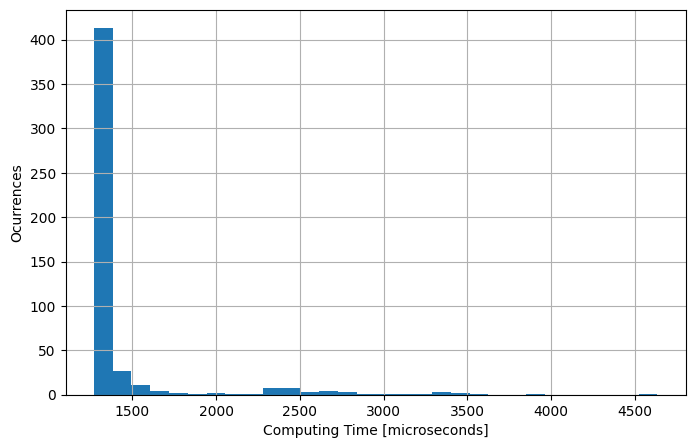

In [8]:
#Importing datatime
from datetime import datetime

#Number of repeats
Nrep = 500
#Size of matrix
n = 20

def Gaussian_Time( n, Nrep ):
    #Arrays of times
    Times = []
    #Cicle for number of repeats
    for i in range(Nrep):
        #Generating random matrix
        M = np.matrix( np.random.random( (n,n+1) ) )

        #Starting time counter
        tstart = datetime.now()
        #Invoking Gaussian Elimination routine
        Gaussian_Elimination(M)
        #Killing time counter
        tend = datetime.now()

        #Saving computing time
        Times.append( (tend-tstart).microseconds )

    #Numpy Array
    Times = np.array(Times)

    print("The mean computing time for a %dx%d matrix is: %lf microseconds"%(n,n,Times.mean()))

    #Histrogram
    plt.figure( figsize=(8,5) )
    histo = plt.hist( Times, bins = 30 )
    plt.xlabel( "Computing Time [microseconds]" )
    plt.ylabel( "Ocurrences" )
    plt.grid()

    return Times.mean()


Gaussian_Time( n, Nrep )

**Activity**: Using the previous code, estimate the computing time for random matrices of size $n=5,10,50,100,500,(optional: 1000)$. For each size, compute $500$ times in order to reduce spurious errors. Plot the results in a figure of $n$ vs computing time. Is it verified the some of scaling laws (Multiplication/Division or Addition/Sustraction). Note that for large values of $n$, both scaling laws converge to the same.

## <font color='red'>     Pivoting Strategies </font>

The previous method of Gaussian Elimination for finding solutions of linear systems is mathematically exact, however round-off errors that appear in computational arithmetics can represent a real problem when high accuracy is required.

In order to illustrate this, consider the next situation:

$$ E_1: 0.00300x_1 + 59.14x_2 = 59.17 $$
$$ E_2: 5.291x_1 - 6.130x_2 = 46.78 $$

Using four-digit arithmetic we obtain:

**1.** Constructing the augmented matrix:

$$ \left[ \matrix{
0.003 & 59.14 & \vdots & 59.17 \\
5.291 & -6.130 & \vdots & 46.78
}\right] $$

**2.** Applying the reduction with the first pivot, we obtain:

$$(E_1 + m E_2)\rightarrow (E_1)$$

where:

$$m = -\frac{a_{21}}{a_{11}} = -\frac{5.291}{0.003} = 1763.666\cdots \approx 1764$$

In this step, we have taken the first four digits. This leads us to:

$$ \left[ \matrix{
0.003 & 59.14 & \vdots & 59.17 \\
0 & -104300 & \vdots & -104400
}\right] $$

The exact system is instead

$$ \left[ \matrix{
0.003 & 59.14 & \vdots & 59.17 \\
0 & -104309.37\bar{6} & \vdots & -104309.37\bar{6}
}\right] $$

Using the solution $x_2 \approx 1.001$, we obtain

$$ x_1 \approx \frac{59.17 - (59.14)(1.001)}{0.00300} = -10 $$

The exact solution is however:

$$ x_1 = 10.00 $$

The source of such a large error is that the factor $59.14/0.00300 \approx 20000$. This quantity is propagated through the combination steps of the Gaussian Elimination, yielding a complete wrong result.

- - -

### Partial pivoting

A suitable method to reduce round-off errors is to choose a pivot more conveniently. As we saw before, a small pivot generally implies larger propagated errors as they appear usually as dividends. The partial pivoting method consists then of a choosing of the largest absolute coefficient associated to $x_i$ instead of the first non-null one, i.e.

$$ |a_{ii}| = \max_{i\leq j\leq n}|a_{ji}| $$

This way, propagated multiplication errors would be minimized.

### <span style='color:red'> Activity </span>

Create a new routine `Gaussian_Elimination_Pivoting` from `Gaussian_Elimination` in order to include the partial pivoting method. Compare both routines with some random matrix and with the exact solution.

- - -

## <font color='red'>     Matrix Inversion </font>

Asumming a nonsingular matrix $A$, if a matrix $A^{-1}$ exists, with $AA^{-1} = I$ and $A^{-1}A = I$, where $I$ is the identity matrix, then $A^{-1}$ is called the inverse matrix of $A$. If such a matrix does not exist, $A$ is said to be a singular matrix.

A corollary of this definition is that $A$ is also the inverse matrix of $A^{-1}$.

Once defined the Gaussian Elimination method, it is possible to extend it in order to find the inverse of any nonsingular matrix.
Let's consider the next equation:

$$ AA^{-1} = AB= \left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{m1} & a_{n2} & \cdots & a_{nn}
}\right]\left[ \matrix{
b_{11} & b_{12} & \cdots & b_{1n} \\
b_{21} & b_{22} & \cdots & b_{2n} \\
\vdots & \vdots & & \vdots\\
b_{n1} & b_{n2} & \cdots & b_{nn}
}\right] =
\left[ \matrix{
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & 1
}\right]$$

This can be rewritten as a set of $n$ systems of equations, i.e.

$$ \left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn}
}\right]\left[ \matrix{
b_{11} \\
b_{21} \\
\vdots \\
b_{n1}
}\right] =
\left[ \matrix{
1 \\
0 \\
\vdots \\
0
}\right],$$

$$\left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn}
}\right]\left[ \matrix{
b_{12} \\
b_{22} \\
\vdots \\
b_{n2}
}\right] =
\left[ \matrix{
0 \\
1 \\
\vdots \\
0
}\right]$$

$$\vdots$$
$$\left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn}
}\right]\left[ \matrix{
b_{1n} \\
b_{2n} \\
\vdots \\
b_{nn}
}\right] =
\left[ \matrix{
0 \\
0 \\
\vdots \\
1
}\right]$$

These systems can be solved individually by using Gaussian Elimination, however we can mix all the problems, obtaining the augmented matrix:

$$\left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1n} & \vdots & 1 & 0 & \cdots & 0 \\
a_{21} & a_{22} & \cdots & a_{2n} & \vdots & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn} & \vdots & 0 & 0 & \cdots & 1
}\right]$$

Now, applying Gaussian Elimination we can obtain a upper diagonal form for the first matrix. Completing the steps using forwards elimination we can convert the first matrix into the identity matrix, obtaining

$$\left[ \matrix{
1 & 0 & \cdots & 0 & \vdots & b_{11} & b_{12} & \cdots & b_{1n} \\
0 & 1 & \cdots & 0 & \vdots & b_{21} & b_{22} & \cdots & b_{2n} \\
\vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & & \vdots\\
0 & 0 & \cdots & 1 & \vdots & b_{n1} & b_{n2} & \cdots & b_{nn}
}\right]$$

Where the second matrix is then the inverse $B=A^{-1}$.

### <span style='color:red'> Activity </span>

Using the previous routine `Gaussian_Elimination_Pivoting` or the simple one `Gaussian_Elimination` to create a new routine `Inverse` that calculates the inverse of any given squared matrix.


- - -

## <font color='red'>     Determinant of a Matrix </font>

The determinant of a matrix is a scalar quantity calculated for square matrix. This provides important information about the matrix of coefficients of a system of linear of equations. For example, any system of $n$ equations and $n$ unknowns has an unique solution if the associated determinant is nonzero. This also implies the determinant allows to evaluate whether a matrix is singular or nonsingular.

### Calculating determinants

Next, we shall define some properties of determinants that will allow us to calculate determinants by using a recursive code:

**1.** If $A = [a]$ is a $1\times 1$ matrix, its determinant is then $\det A = a$.

**2.** If $A$ is a $n\times n$ matrix, the minor matrix $M_{ij}$ is the determinant of the $(n-1)\times(n-1)$ matrix obtained by deleting the $i$th row and the $j$th column.

**3.** The cofactor $A_{ij}$ associated with $M_{ij}$ is defined by $A_{ij} = (-1)^{i+j}M_{ij}$.

**4.** The determinant of a $n\times n$ matrix $A$ is given by:

$$ \det A = \sum_{j=1}^n a_{ij}A_{ij} $$

or

$$ \det A = \sum_{i=1}^n a_{ij}A_{ij} $$

This is, it is possible to use both, a row or a column for calculating the determinant.

### Computing time of determinants

Using the previous recurrence, we can calculate the computing time of the previous algorithm. First, let's consider the number of required operations for a $2\times 2$ matrix: let $A$ be a $2\times 2$ matrix given by:

$$ A = \left[ \matrix{
a_{11} & a_{12} \\
a_{21} & a_{22}}\right]$$

The determinant is then given by:

$$\det(A) = a_{11}a_{22} - a_{12}a_{21}$$

the number of required multiplications was $2$ and subtractions is $1$.

Now, using the previous formula for the determinant

$$ \det A = \sum_{j=1}^n a_{ij}A_{ij} $$

For a $3\times 3$ matrix, it is necessary to calculate $3$ times $2\times 2$ determinants. Besides, it is necessary to multiply the cofactor $A_{ij}$ with the coefficient $a_{ij}$, that leads us with $t_{n=3}=3\times 2 + 3$ multiplications. Additions are not important as their computing time is far less than multiplications.

For a $4\times 4$ matrix, we need four deteminants of $3\times 3$ submatrices, leading $t_{n=4} = 4\times( 3\times 2 + 3 ) + 4 = 4! + \frac{4!}{2!} + \frac{4!}{3!}$. In general, for a $n\times n$ matrix, we have then:

$$ t_{n} = \frac{n!}{(n-1)!} + \frac{n!}{(n-2)!} + \cdots + \frac{n!}{1!} = n!\left( \sum_{i=1}^{n-1}\frac{1}{i!} \right)$$

If $n$ is large enough, we can approximate $t_{n}\approx n!$

In computers, this is a prohibitive computing time so other schemes have to be proposed.

### <span style='color:red'> Activity </span>

Evaluate the computing time of the `Determinant` routine for matrix sizes of $n=1,2,3,\cdots,10$ and doing several repeats. Plot your result ($n$ vs $t_n$). What can you conclude about the behaviour of the computing time?

### Properties of determinants

Determinants have a set of properties that can reduce considerably computing times. Suppose $A$ is a $n\times n$ matrix:

**1.** If any row or column of $A$ has only zero entries, then $\det A = 0$.

**2.** If two rows or columns of $A$ are the same, then $\det A = 0$.

**3.** If $\hat A$ is obtained from $A$ by using a swap operation $(E_i)\leftrightarrow (E_j)$, then $\det \hat A=-\det A$.

**4.** If $\hat A$ is obtained from $A$ by using a escalation operation $(\lambda E_i)\leftrightarrow (E_i)$, then $\det \hat A=\lambda \det A$.

**5.** If $\hat A$ is obtained from $A$ by using a combination operation $(E_i+\lambda E_j) \leftrightarrow (E_i)$, then $\det \hat A=\det A$.

**6.** If $B$ is also a $n\times n$ matrix, then $\det(AB)=(\det A)(\det B).$

**7.** $\det A^t=\det A.$

**8.** $\det A^{-1}=(\det A)^{-1}$

**9.** Finally and most importantly: if $A$ is an upper, lower or diagonal matrix, then:

$$ \det A = \prod_{i=1}^n a_{ii} $$

As we analysed before, Gaussian Elimination takes a computing time scaling like $n^3$ for large matrix sizes. According to the previous properties, the determinant of a upper diagonal matrix just takes $n-1$ multiplications, far less than a nondiagonal matrix. Combining these properties, we can track back and relate the determinant of the resulting upper diagonal matrix and the original one. Leading us to a computing time scaling like $n^3$, much better than the original $n!$.

### <span style='color:red'> Activity </span>

Using the `Gaussian_Elimination` routine and tracking back the performed operations, construct a new routine called `Gaussian_Determinant`. Make the same analysis of the computing time as the previous activity. Compare both results.

### Existence of inverse
A matrix $A$ has an inverse if $\det{A}\ne 0$. See for example [here](http://www.sosmath.com/matrix/inverse/inverse.html)

If the matrix $A$ has an inverse, then
\begin{align}
A \boldsymbol{x}=&\boldsymbol{b}\\
A^{-1}A\boldsymbol{x}=&A^{-1}\boldsymbol{b}\\
\boldsymbol{x}=&A^{-1}\boldsymbol{b}\,,
\end{align}

__Example__
From the previous example

In [19]:
np.random.seed(3)
M =  np.random.random( (4,5) )
M

array([[0.5507979 , 0.70814782, 0.29090474, 0.51082761, 0.89294695],
       [0.89629309, 0.12558531, 0.20724288, 0.0514672 , 0.44080984],
       [0.02987621, 0.45683322, 0.64914405, 0.27848728, 0.6762549 ],
       [0.59086282, 0.02398188, 0.55885409, 0.25925245, 0.4151012 ]])

In [20]:
M[:,0]

array([0.5507979 , 0.89629309, 0.02987621, 0.59086282])

In [21]:
np.c_[M[:,0]]

array([[0.5507979 ],
       [0.89629309],
       [0.02987621],
       [0.59086282]])

In [22]:
A=np.c_[ tuple( [ np.c_[M[:,i]]    for i in range(4) ] ) ]
A

array([[0.5507979 , 0.70814782, 0.29090474, 0.51082761],
       [0.89629309, 0.12558531, 0.20724288, 0.0514672 ],
       [0.02987621, 0.45683322, 0.64914405, 0.27848728],
       [0.59086282, 0.02398188, 0.55885409, 0.25925245]])

In [31]:
#simple form to take the matrix A
M[:,:-1]

array([[0.5507979 , 0.70814782, 0.29090474, 0.51082761],
       [0.89629309, 0.12558531, 0.20724288, 0.0514672 ],
       [0.02987621, 0.45683322, 0.64914405, 0.27848728],
       [0.59086282, 0.02398188, 0.55885409, 0.25925245]])

In [23]:
b=np.c_[ M[:,4] ]
b

array([[0.89294695],
       [0.44080984],
       [0.6762549 ],
       [0.4151012 ]])

such that
\begin{align}
A \boldsymbol{x}=&\boldsymbol{b}\,,
\end{align}

Check that $A$ has an inverse and calculate $\boldsymbol{x}$


In [24]:
np.linalg.det(A)

np.float64(-0.0967223339297434)

$\boldsymbol{x}=$

In [25]:
sympy.Matrix( np.dot( np.linalg.inv(A) , b).round(4) )

Matrix([
[ 0.274],
[0.8722],
[0.4114],
[0.0093]])

#### Numpy implementation

In [26]:
np.linalg.solve(A,b)

array([[0.27395594],
       [0.8721633 ],
       [0.41137442],
       [0.00932074]])

In [32]:
#Using M matrix directly
np.linalg.solve(M[:,:-1],M[:,4])

array([0.27395594, 0.8721633 , 0.41137442, 0.00932074])

## <font color='red'>     Matrix diagonalization </font>

## LU Factorization

As we saw before, the Gaussian Elimination algorithm takes a computing time scaling as $\mathcal{O}(n^3/3)$ in order to solve a system of $n$ equations and $n$ unknowns. Let's assume a system of equations $\mathbf{A}\mathbf{x} = \mathbf{b}$ where $\mathbf{b}$ is already in upper diagonal form.

$$\left[ \matrix{
a_{11} & a_{12} & \cdots & a_{1(n-1)} & a_{1n} & \vdots & \hat b_1 \\
0 & a_{22} & \cdots & a_{2(n-1)} & a_{2n} & \vdots & \hat b_2 \\
\vdots & \vdots &  & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \cdots & a_{(n-1)(n-1)} & a_{(n-1)n} & \vdots & \hat b_{n-1} \\
0 & 0 & \cdots & 0 & a_{nn} & \vdots & \hat b_n
}\right]$$

The Gauss-Jordan algorithm can reduce even more this problem in order to solve it directly, yielding:

$$\left[ \matrix{
1 & 0 & \cdots & 0 & 0 & \vdots & x_1 \\
0 & 1 & \cdots & 0 & 0 & \vdots & x_2 \\
\vdots & \vdots &  & \vdots & \vdots & \vdots & \vdots \\
0 & 0 & \cdots & 1 & 0 & \vdots & x_{n-1} \\
0 & 0 & \cdots & 0 & 1 & \vdots & x_n
}\right]$$

From the upper diagonal form to the completely reduced one, it is necessary to perform $n+(n-1)+(n-2)+\cdots\propto n(n-1)$ backwards substitutions. The computing time for solving a upper diagonal system is then $\mathcal{O}(n^2)$.


Now, let $\mathbf{A}\mathbf{x} = \mathbf{b}$ be a general system of equations of $n$ dimensions. Let's assume $\mathbf{A}$ can be written as a multiplication of two matrices, one lower diagonal $\mathbf{L}$ and other upper diagonal $\mathbf{U}$, such that $\mathbf{A}=\mathbf{L}\mathbf{U}$. Defining a vector $\mathbf{y} = \mathbf{U}\mathbf{x}$, it is obtained for the original system

$$ \mathbf{A} \mathbf{x}=\mathbf{L}(\mathbf{U}\mathbf{x}) = \mathbf{L}\mathbf{y} = \mathbf{b}$$

For solving this system we can then:

**1.** Solve the equivalent system $\mathbf{L}\mathbf{y} = \mathbf{b}$, what takes a computing time of $\mathcal{O}(n^2)$.

**2.** Once we know $\mathbf{y}$, we can solve the system $\mathbf{U}\mathbf{x} = \mathbf{y}$, with a computing time of $\mathcal{O}(n^2)$.

The global computing time is then $\mathcal{O}(2n^2)$

### <span style='color:red'> Activity </span>

In order to compare the computing time that Gaussian Elimination takes and the previous time for the LU factorization, make a plot of both computing times. What can you conclude when $n$ becomes large enough?

### Derivation of LU factorization

Although the LU factorization seems to be a far better method for solving linear systems as compared with say Gaussian Elimination, we was assuming we already knew the matrices $\mathbf{L}$ and $\mathbf{U}$. Now we are going to see the algorithm for perfoming this reduction takes a computing time of $\mathcal{O}(n^3/3)$.

You may wonder then, what advantage implies the use of this factorization? Well, matrices $\mathbf{L}$ and $\mathbf{U}$ do not depend on the specific system to be solved, i.e. there is not dependence on the $\mathbf{b}$ vector, so once we have both matrices, we can use them to solve any system we want, just taking a $\mathcal{O}(2n^2)$ computing time.

First, let's assume a matrix $\mathbf{A}$ with all its pivots are nonzero, so there is not need to swap rows. Now, when we want to eliminate all the coefficients associated to $x_1$, we perform the next operations:

$$ (E_j-m_{j1}E_1)\rightarrow (E_j), \ \ \ \ \mbox{where}\ \ \ \ m_{j1} = \frac{a^{(1)}_{j1}}{a^{(1)}_{11}} $$

henceforth, $a^{(1)}_{ij}$ denotes the components of the original matrix $\mathbf{A}=\mathbf{A}^{(1)}$, $a^{(2)}_{ij}$ the components of the matrix after eliminating the coefficients of $x_1$, and generally, $a^{(k)}_{ij}$ the components of the matrix after eliminating the coefficients of $x_{k-1}$.

The previous operation over the matrix $\mathbf{A}$ can be also reproduced defining the matrix $\mathbf{M}^{(1)}$

$$\mathbf{M}^{(1)} = \left[ \matrix{
1 & 0 & \cdots & 0 & 0 \\
-m_{21} & 1 & \cdots & 0 & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
-m_{(n-1)1} & 0 & \cdots & 1 & 0 \\
-m_{n1} & 0 & \cdots & 0 & 1
}\right]$$

This is called the **first Gaussian transformation matrix**. From this, we have

$$ \mathbf{A}^{(2)}\mathbf{x} = \mathbf{M}^{(1)}\mathbf{A}^{(1)}\mathbf{x} = \mathbf{M}^{(1)}\mathbf{b}^{(1)} = \mathbf{b}^{(2)} $$

where $\mathbf{A}^{(2)}$ is matrix with null coefficients associated to $x_1$ but the first one.

Repeating the same procedure for the next pivots, we obtain then

$$ \mathbf{A}^{(n)} = \mathbf{M}^{(n-1)}\mathbf{M}^{(n-2)}\cdots \mathbf{M}^{(1)}\mathbf{A}^{(1)} $$

where the **$k$th Gaussian transformation matrix** is defined as

$$\mathbf{M}^{(k)}_{ij} = \left\{ \matrix{
1 & \mbox{if}\ \ i=j \\
-m_{ij} & \mbox{if}\ \ j=k\ \ \mbox{and}\ \ k+1\leq i \leq n \\
0 & \mbox{otherwise}
}  \right.$$

and

$$m_{ij} = \frac{a^{(j)}_{ij}}{a^{(j)}_{jj}} $$

Note $\mathbf{A}^{(n)}$ is a upper diagonal matrix given by

$$\mathbf{A}^{(n)} = \left[ \matrix{
a_{11}^{(n)} & a_{12}^{(n)} & \cdots & a_{1(n-1)}^{(n)} & a_{1n}^{(n)}\\
0 & a_{22}^{(n)} & \cdots & a_{2(n-1)}^{(n)} & a_{2n}^{(n)} \\
\vdots & \vdots &  & \vdots & \vdots &\\
0 & 0 & \cdots & a_{(n-1)(n-1)}^{(n)} & a_{(n-1)n}^{(n)} \\
0 & 0 & \cdots & 0 & a_{nn}^{(n)}
}\right]$$

so we can define $\mathbf{U}\equiv \mathbf{A}^{(n)}$.

Now, taking the equation

$$ \mathbf{A}^{(n)} = \mathbf{M}^{(n-1)}\mathbf{M}^{(n-2)}\cdots \mathbf{M}^{(1)}\mathbf{A}^{(1)} $$

and defining the inverse of $\mathbf{M}^{(k)}$ as

$$ \mathbf{L}^{(k)}_{ij} = \left(\mathbf{M}^{(k)}\right)^{-1}_{ij} =  \left\{ \matrix{
1 & \mbox{if}\ \ i=j \\
m_{ij} & \mbox{if}\ \ j=k\ \ \mbox{and}\ \ k+1\leq i \leq n \\
0 & \mbox{otherwise}
}  \right.$$

we obtain

$$ \mathbf{L}^{(1)} \cdots \mathbf{L}^{(n-2)}\mathbf{L}^{(n-1)}\mathbf{A}^{(n)} = \mathbf{L}^{(1)} \cdots \mathbf{L}^{(n-2)}\mathbf{L}^{(n-1)}\mathbf{M}^{(n-1)}\mathbf{M}^{(n-2)}\cdots \mathbf{M}^{(1)}\mathbf{A}^{(1)} = \mathbf{L}\mathbf{U} $$

where the lower diagonal matrix $\mathbf{L}$ is given by:

$$ \mathbf{L} = \mathbf{L}^{(1)} \cdots \mathbf{L}^{(n-2)}\mathbf{L}^{(n-1)} $$.

### Algorithm for LU factorization

The algorithm is then given by:

**1.** Give a square matrix $\mathbf{A}$ where the pivots are nonzero.

**2.** Apply the operation $Comb(E_j,E_1,-a^{(1)}_{j1}/aa^{(1)}_{11})$. This eliminates the coefficients associated to $x_1$ in all the rows but in the first one.

**3.** Construct the matrix $\mathbf{L}^{(1)}$ given by

$$ \mathbf{L}^{(k)}_{ij} =  \left\{ \matrix{
1 & \mbox{if}\ \ i=j \\
m_{ij} = \frac{a^{(j)}_{ij}}{a^{(j)}_{jj}} & \mbox{if}\ \ j=k\ \ \mbox{and}\ \ k+1\leq i \leq n \\
0 & \mbox{otherwise}
}  \right.$$

with $k=1$.

**4.** Repeat the steps **2** and **3** for the next column until reaching the last one.

**5.** Return the matrices $\mathbf{U} = \mathbf{A}^{(n)}$ and $ \mathbf{L} = \mathbf{L}^{(1)} \cdots \mathbf{L}^{(n-2)}\mathbf{L}^{(n-1)} $.

### <span style='color:red'> Activity </span>

Create a routine called `LU_Factorization` that, given a matrix $\mathbf{A}$ and the previous algorithm, calculate the LU factorization of the matrix. Test your routine with a random square matrix, verify that $\mathbf{A} = \mathbf{L}\mathbf{U}$.

- - -

In [ ]:
M1

array([[ 5, -4,  0],
       [-4,  7, -3],
       [ 0, -3,  5]])

In [ ]:
import scipy

In [ ]:
P,L,U=scipy.linalg.lu(M1)

NameError: name 'M1' is not defined

In [ ]:
U

array([[ 5.        , -4.        ,  0.        ],
       [ 0.        ,  3.8       , -3.        ],
       [ 0.        ,  0.        ,  2.63157895]])

The same obtained before

In [ ]:
scipy.linalg.lu?

### <span style='color:red'> Eigenvalues and Eigenvectors activity  </span>

#### Electron interacting with a magnetic field

An electron is placed to interact with an uniform magnetic field. To give account of the possible allowed levels of the electron in the presence of the magnetic field it is necessary to solve the next equation

\begin{equation}
\hat{H}|\Psi\rangle = E|\Psi\rangle
\end{equation}

where the hamiltonian is equal to $H = -\mu \cdot B = -\gamma B \cdot S$, with the gyromagnetic ratio $\gamma$, $\textbf{B}$ the magnetic field and $\textbf{S}$ the spin. It can be shown that the hamiltonian expression is transformed in

\begin{equation}
\hat{\textbf{H}} = - \frac{\gamma \hbar}{2} \left( \begin{array}{cc}
B_z  & B_x -i B_y \\
B_x + i B_y  & -B_z  \end{array} \right)
\end{equation}

Then, by solving the problem $|H - EI|=0$ is found the allowed energy levels, i.e., finding the determinant of the
matrix $H - EI$ allows to get the values $E_1$ and $E_2$.



And solving the problem $\hat{H}\Psi$ - E$\Psi = 0$ gives the autofunctions $\Psi$, i.e., the column vector $\Psi= \{\Psi_1, \Psi_2\}$.

The function scipy.optimize.root can be used to get roots of a given equation. The experimental value of $\gamma$ for the electron is 2. The order of magnitude of the magnetic field is $1g$.



1)  Find the allowed energy levels.



2)  Find the autofunctions and normalize them.



**Hint:** An imaginary number in python can be written as 1j.  
